# Part II - (Prosper loan slide deck)
## by (Tobechukwu Olih)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

>> The distribution and explain the disparity in the maximum prosper score and the average 

>> The employment status and income bracket of the highest loan takers

>> The inter relationship between The on time payment of the loans and the Total loans that can be given 

>> The inter relationship between the prosper rating and the prosper score of the individuals

>> The inter relationship between the Lenders yield and the duration of the loan

>> The inter relationship between the Lenders yield and the prosper ratings

>> To show the inter relationship between Employment status, the lender yield of given loans and the prosper rating

>> To show the inter relationship between Employment status, the on time payment of given loans and the total loans that can be given 


> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

>> The dataset contains loan information for approximately 114,000 loans analysing metrixes such as lender yield rate, the status of repayment among other data points. The data set contained 113937 rows and 81 columns with data types ranging from object to float.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_pl = pd.read_csv("prosperLoanData.csv")
list_columns = ["LoanStatus","LenderYield","ProsperRating (numeric)","ProsperScore","ListingCategory (numeric)","Occupation","EmploymentStatus","IsBorrowerHomeowner",
               "CurrentDelinquencies","AmountDelinquent","DelinquenciesLast7Years","IncomeRange","TotalProsperLoans","OnTimeProsperPayments","BorrowerState"]
df_pl = df_pl[list_columns]
df1 = df_pl.copy()
df1.dropna(inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The maximum prosper score and average disparity

Why was there a disparity in the maximum prosper score and the average prosper score? 

The borrowers with prosper score of 8 appears to be max but the The average prosper score is 6.0. This is indicative of prosper scores with 6 and below have more distribution of borrowers than higher prosper scores of 8.0 and upwards, this caused the avarage to be shifted more towards the left/lower prosper score which is indicative of a higher number of distribution of prosper scores on the lower end of the distribution.

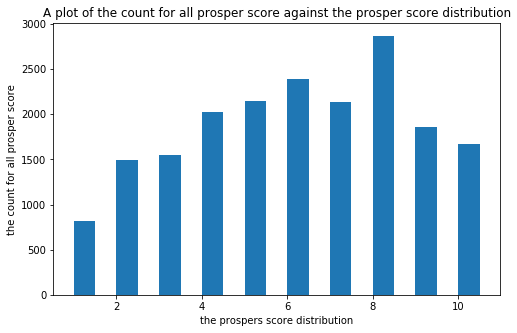

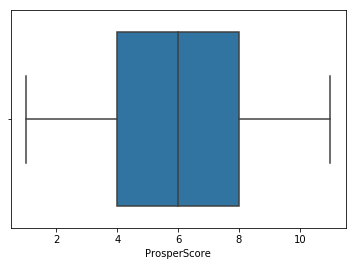

In [3]:
binsize = .5
bins = np.arange(df1["ProsperScore"].min(),df1["ProsperScore"].max(), binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'ProsperScore', bins = bins)
plt.title("A plot of the count for all prosper score against the prosper score distribution")
plt.xlabel("the prospers score distribution")
plt.ylabel("the count for all prosper score");
plt.show()

sb.boxplot(data = df1 , x = "ProsperScore");

## The maximum prosper score and average disparity

What was The employment status and income bracket of the highest loan takers?

>> There were more loans given to people who were employed with a higher frequency for full-time staff, and self employed people. this may hit to a bias by the firms towards some sort of income frequency. In exploring what employment status had the highest number of borrowers I found that full time followed by self employed people had the highest, this is probaby due to them having the highest ability to pay back the loans given



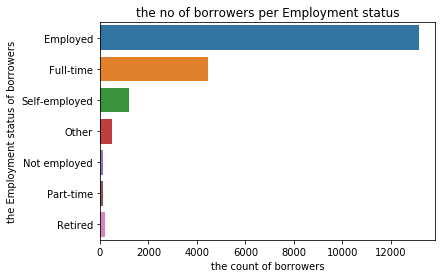

In [4]:
sb.countplot(data = df1, y = "EmploymentStatus");
plt.title("the no of borrowers per Employment status")
plt.ylabel("the Employment status of borrowers")
plt.xlabel("the count of borrowers");

## The Income range with the highest borrowing

What income range borrowed the most?

>> The People with an income range of 25k-49k and 50 - 75k had a higher number of loans taken out by them, while those in higher income ranges and more lower income ranges took out less loans indicative of them being able to fund their lifestyles as is 

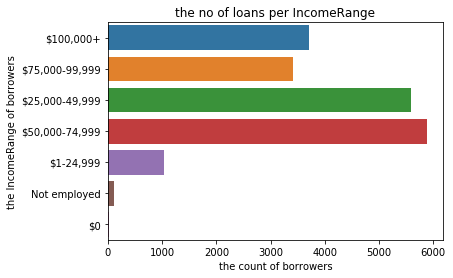

In [5]:
def cat_plot(var):
    label = df1[var].value_counts().index
    sb.countplot(data = df1, y = var, label = label);
    plt.title(f"the no of loans per {var}")
    plt.ylabel(f"the {var} of borrowers")
    plt.xlabel("the count of borrowers")
    
cat_plot("IncomeRange")

## Relationship between ontime prosper payment and total prosper loans

>> There is a strong positive correlation between the ontime prosper payments and the total prosper loans gotten. this shows that more loans are given to people who pay back the loans on time and on schedule. 

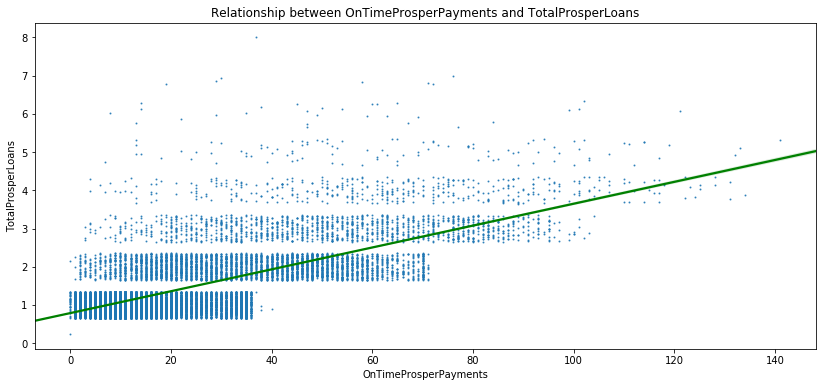

In [6]:
def reg_plot_func(a , b, x_jitter=0, y_jitter=0):
    '''
    docustring: This is a function that plots the numeric discrete variables against each other reducing the need for repitition
    input: numeric variable 1
    output: numeric variable 2
    '''
    
    #Set plot dimensions
    plt.figure(figsize=[14,6])
    sb.regplot (data = df1, x = a, y = b,x_jitter=x_jitter, y_jitter=y_jitter,
                scatter_kws={'s':1}, line_kws={'color': 'green'})
    plt.title(f'Relationship between {a} and {b}')

reg_plot_func("OnTimeProsperPayments","TotalProsperLoans", y_jitter =0.35)

## Relationship between prosper rating and prosper score

>> There is also a strong positive correlation between the prosper rating and the prosper score of the individuals, this means that the higher your prosper score the higher rated you are which can translate to more loans

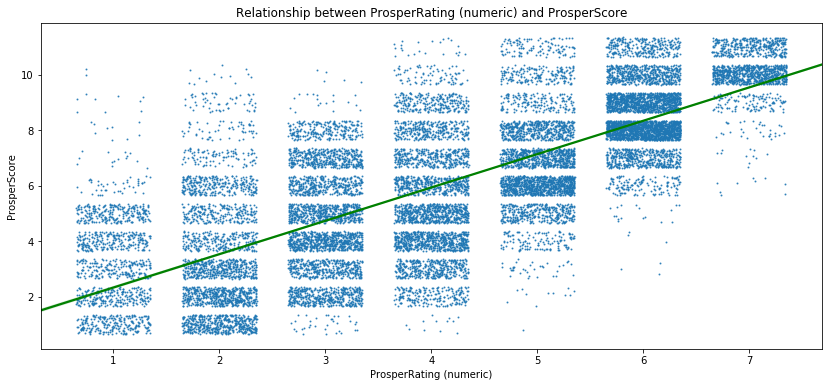

In [7]:
reg_plot_func("ProsperRating (numeric)", "ProsperScore", x_jitter=0.35, y_jitter=0.35)

## The inter relationship between the Lenders yield and the duration of the loan

>> The longer the time the person takes to pay back the loan, the higher the yield the lender stands to gain from the loan given.

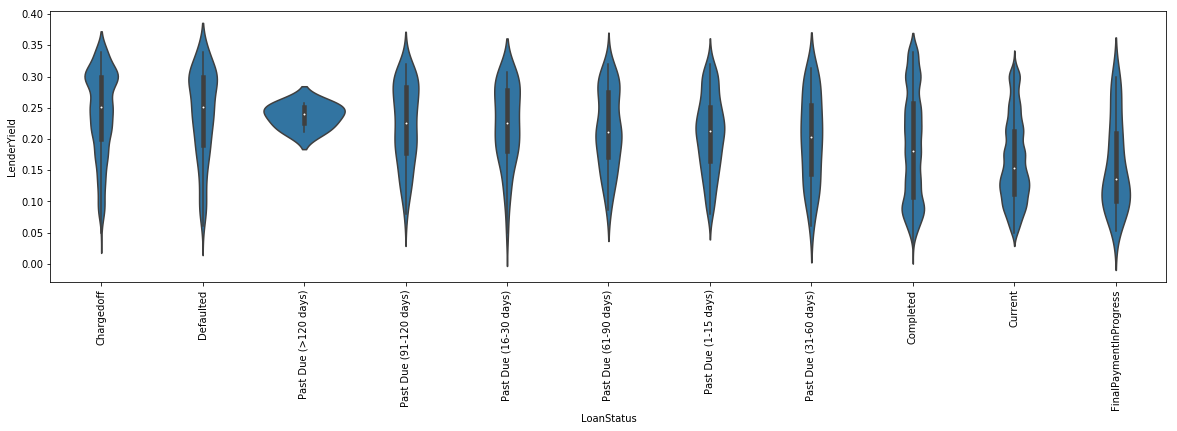

In [8]:
def vio_plot_func(a , b):
    index_col = df1.groupby(a)[b].mean().sort_values(ascending = False).index
    plt.figure(figsize= [20, 5])
    color_fav = sb.color_palette()[0]
    sb.violinplot(data = df1 , x = a , y = b,color = color_fav , order = index_col)
    plt.xticks(rotation = 90);

vio_plot_func("LoanStatus", "LenderYield")

## The inter relationship between the Lenders yield and the prosper ratings

>> If a borrower has a good prosper score , this will have a negative effect on the lendersyield meaning the lender gains less from people with higher prosper rating as they tend to pay back thier loans on time and on schedule

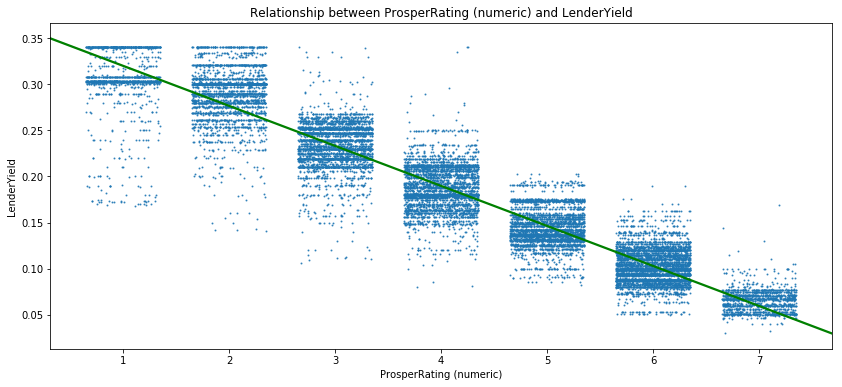

In [9]:
reg_plot_func("ProsperRating (numeric)", "LenderYield", x_jitter=0.35)

## the inter relationship between Employment status, the lender yield of given loans and the prosper rating

>> The strong negative correlation with the facet grid with the width still close to the corelation line shows that the relationship between all three is close and tight which shows that the Employment status can predict the strong correlation of on lower lender yield with higher prosper rating

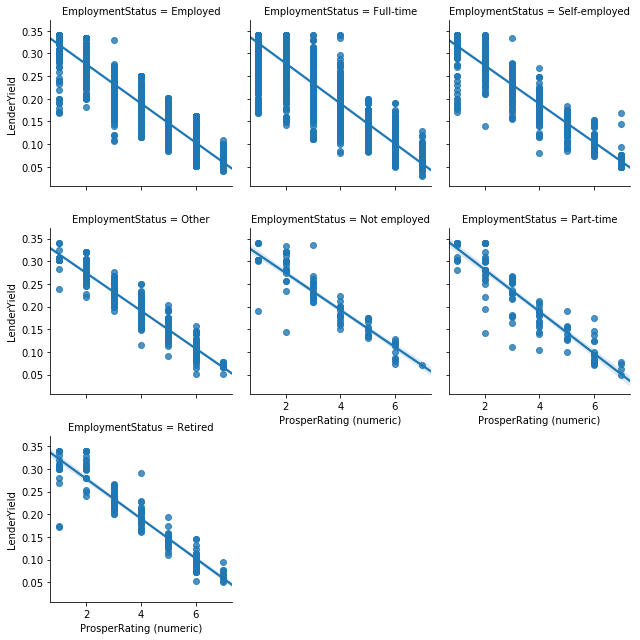

In [10]:
g = sb.FacetGrid(data = df1 , col = "EmploymentStatus", col_wrap= 3)
g.map(sb.regplot, "ProsperRating (numeric)", "LenderYield")

## the inter relationship between Employment status, the on time payment of given loans and the total loans that can be given

>> The strong positive correlation with the facet grid with the width still close to the corelation line shows that the relationship between all three is close and tight which shows that the Employment status can predict the strong correlation of on time prosper payment and the total prosper loans

In [ ]:
g = sb.FacetGrid(data = df1 , col = "EmploymentStatus", col_wrap= 3)
g.map(sb.regplot, "OnTimeProsperPayments", "TotalProsperLoans")

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


In [ ]:
!jupyter nbconvert Prosper_slidedeck.ipynb --to slides --post serve --no-input --no-prompt